In [41]:
import numpy as np 
from matplotlib import pyplot as plt 

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [43]:
def hypothesis(x_i, w, b):
    return sigmoid(np.dot(x_i, w) + b)

In [44]:
def cost_function(x, y, w, b):
    cost = 0
    m = x.shape[0]

    for i in range(m):
        cost += y[i] * np.log(hypothesis(x[i], w, b)) + (1 - y[i]) * np.log(1 - hypothesis(x[i], w, b))
    
    cost /= -m
    return cost

In [45]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    gradient = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = hypothesis(x[i], w, b) - y[i]
        for j in range(n):
            gradient[j] += err * x[i, j]
        
        dj_db += err
    
    dj_db /= m
    gradient /= m

    return gradient, dj_db


In [83]:
def gradient_descent(x, y, w, b, alpha, iter = 5000):
    m, n = x.shape
    iteration = []
    totalCosts = []

    for i in range(iter):
        gradient, dj_db = compute_gradient(x, y, w, b)
        totalCost = cost_function(x, y, w, b)

        w = w - alpha * gradient
        b = b - alpha * dj_db

        if i % 500 == 0:
            print(f"Iteration: {i}, Cost: {totalCost}")
            iteration.append(i)
            totalCosts.append(totalCost)

    
    return w, b, totalCosts, iteration

In [47]:
# DUMMY DATA
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
w_initial = np.zeros((x_train.shape[1],))
b_initial = 0
alpha = 0.3
iter = 100000

w_final, b_final, costs, iterations = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, iter)
print(w_final, b_final)

Iteration: 0, Cost: 0.6931471805599453
Iteration: 500, Cost: 0.11084657880737503
Iteration: 1000, Cost: 0.05703064001958463
Iteration: 1500, Cost: 0.03813926155669072
Iteration: 2000, Cost: 0.02859475115258534
Iteration: 2500, Cost: 0.022853582346995107
Iteration: 3000, Cost: 0.019025252213742894
Iteration: 3500, Cost: 0.016292214343168045
Iteration: 4000, Cost: 0.0142440769877857
Iteration: 4500, Cost: 0.012652453952096077
Iteration: 5000, Cost: 0.011380229880364216
Iteration: 5500, Cost: 0.010340146617525924
Iteration: 6000, Cost: 0.009474048174129756
Iteration: 6500, Cost: 0.008741690599607966
Iteration: 7000, Cost: 0.008114343479191342
Iteration: 7500, Cost: 0.007570949872826614
Iteration: 8000, Cost: 0.007095726290234206
Iteration: 8500, Cost: 0.006676609999256472
Iteration: 9000, Cost: 0.00630422418638858
Iteration: 9500, Cost: 0.005971170154764179
Iteration: 10000, Cost: 0.005671532056247664
Iteration: 10500, Cost: 0.005400523275771721
Iteration: 11000, Cost: 0.00515422936664899

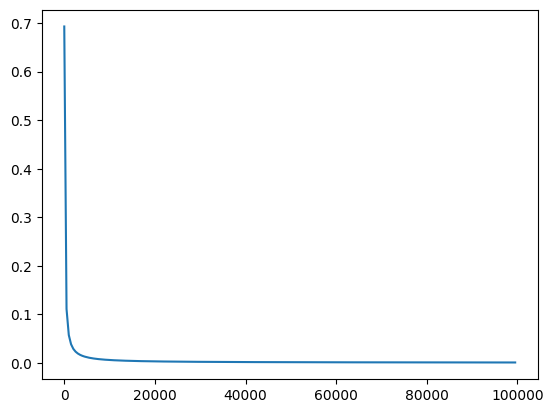

In [48]:
plt.plot(np.array(iterations), np.array(costs))

Iteration: 0, Cost: 0.6931471805599453
Iteration: 500, Cost: 0.0914405585020887
Iteration: 1000, Cost: 0.06108868982403431
Iteration: 1500, Cost: 0.046725564261272
Iteration: 2000, Cost: 0.03797885228157356
Iteration: 2500, Cost: 0.032016921127148164
Iteration: 3000, Cost: 0.027672797264753742
Iteration: 3500, Cost: 0.024361051601389582
Iteration: 4000, Cost: 0.021751234036591932
Iteration: 4500, Cost: 0.019641311369660706
Iteration: 5000, Cost: 0.017900338542126658
Iteration: 5500, Cost: 0.01643954593576072
Iteration: 6000, Cost: 0.015196557585075017
Iteration: 6500, Cost: 0.014126234232691803
Iteration: 7000, Cost: 0.01319509423938132
Iteration: 7500, Cost: 0.012377775152038218
Iteration: 8000, Cost: 0.011654712629932992
Iteration: 8500, Cost: 0.011010573502053046
Iteration: 9000, Cost: 0.010433171289336527
Iteration: 9500, Cost: 0.009912699120712192


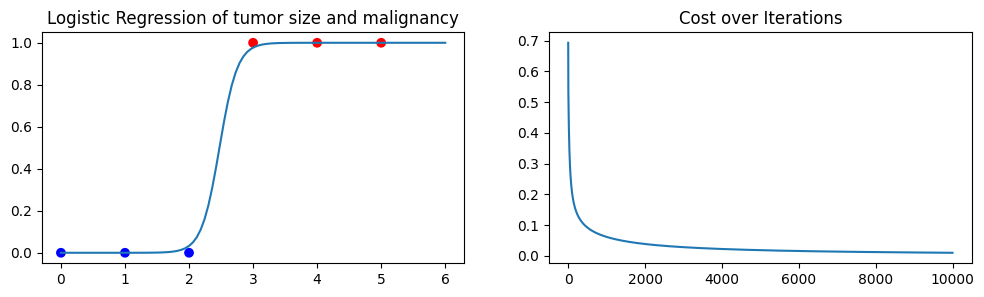

In [94]:
x_train = np.array([[0.], [1], [2], [3], [4], [5]])
y_train = np.array([0,  0, 0, 1, 1, 1])
w_initial = np.zeros((x_train.shape[1],))
b_initial = 0
alpha = 0.3
iter = 10000
colors = ['blue' if label == 0 else 'red' for label in y_train]


w_final, b_final, costs, iterations = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, iter)
x_range = np.linspace(0, 6, 100)
y_range = []

for i in range(len(x_range)):
    y_range.append(hypothesis(np.array([x_range[i]]), np.array(w_final), b_final))

np.array(y_range)

fig,axs = plt.subplots(1,2,figsize=(12,3))
axs[0].scatter(x_train, y_train, c=colors)
axs[0].plot(x_range, y_range)
axs[0].title.set_text('Logistic Regression of tumor size and malignancy')

axs[1].plot(iterations, costs)
axs[1].title.set_text('Cost over Iterations')
plt.show()